<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module6/Transformer/TransformerForTextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install -q torchtext==0.17.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#Data

##Load data

In [ ]:
from datasets import load_dataset

ds = load_dataset('thainq107/ntc-scv')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/570 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

valid-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

##Preprocessing

In [ ]:
import re
import string

def preprocess_text(text):
  #Remove URLs https://www.
  url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
  text = url_pattern.sub(r" ", text)

  #Remove HTML Tags < >
  html_pattern = re.compile(r'<[^<>]>')
  text = html_pattern.sub(r" ", text)

  #Remove punc and digits
  replace_chars = list(string.punctuation + string.digits)
  for char in replace_chars:
    text = text.replace(char, " ")

  #Remove emojis
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U0001F1F2-\U0001F1F4"  # Macau flag
    u"\U0001F1E6-\U0001F1FF"  # flags
    u"\U0001F600-\U0001F64F"  # (repeated emoticons range)
    u"\U00002702-\U000027B0"  # Dingbats
    u"\U000024C2-\U0001F251"  # Enclosed characters
    u"\U0001F926-\U0001F937"  # Additional emojis
    u"\U0001F1F2"             # Partial flag sequence
    u"\U0001F1F4"             # Partial flag sequence
    u"\U0001F620"             # Angry face
    u"\u200d"                 # Zero-width joiner (ZWJ)
    u"\u2640-\u2642"          # Gender symbols
  "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r" ", text)

  #Normalize white spaces
  text = " ".join(text.split())

  #Lowercasing
  text = text.lower()

  return text

In [ ]:
ds['train'] = ds['train'].map(lambda example: {'preprocessed_text': preprocess_text(example['sentence'])}, batched=False)
ds['valid'] = ds['valid'].map(lambda example: {'preprocessed_text': preprocess_text(example['sentence'])}, batched=False)
ds['test'] = ds['test'].map(lambda example: {'preprocessed_text': preprocess_text(example['sentence'])}, batched=False)

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

##Representation

In [ ]:
def yield_tokens(sentences, tokenizer):
  for sentence in sentences:
    yield tokenizer(sentence)

from torchtext.data import get_tokenizer

tokenizer = get_tokenizer('basic_english')

##Build vocab

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(ds['train']['preprocessed_text'], tokenizer),
    max_tokens = vocab_size,
    specials = ["<pad>", "<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

##Convert torchtext dataset

In [ ]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
  for row in df:
    sentence = row['preprocessed_text']
    encoded_sentence = vocabulary(tokenizer(sentence))
    label = row['label']
    yield encoded_sentence, label

train_dataset = prepare_dataset(ds['train'])
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(ds['valid'])
valid_dataset = to_map_style_dataset(valid_dataset)

test_dataset = prepare_dataset(ds['test'])
test_dataset = to_map_style_dataset(test_dataset)

##Create dataloader

In [ ]:
import torch

seq_length = 100

def collate_batch(batch):
  sentences, labels = list(zip(*batch))

  encoded_sentences = [
      sentence + ([0] * (seq_length - len(sentence))) if seq_length > len(sentence)
      else sentence[:seq_length]
      for sentence in sentences
  ]

  encoded_sentences = torch.tensor(encoded_sentences, dtype = torch.int64)
  labels = torch.tensor(labels)

  return encoded_sentences, labels

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size = batch_size,
    shuffle = True,
    collate_fn = collate_batch
)

valid_dataloader = DataLoader(
    valid_dataset,
    batch_size = batch_size,
    shuffle = False,
    collate_fn = collate_batch
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size = batch_size,
    shuffle = False,
    collate_fn = collate_batch
)

#Training functions

##Train for epoch

In [ ]:
def train_epoch(
    model, optimizer, criterion,
    train_dataloader, device, epoch = 0, log_interval = 50):

  model.train()
  total_acc, total_count = 0, 0
  losses = []

  for idx, (inputs, labels) in enumerate(train_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    predictions = model(inputs)
    #compute loss
    loss = criterion(predictions, labels)
    losses.append(loss.item())

    #backward
    loss.backward()
    optimizer.step()

    total_acc += (predictions.argmax(1) == labels).sum().item()
    total_count += labels.size(0)

    if idx % log_interval == 0 and idx > 0:
      print(
          "| epoch {:3d} | {:5d}/{:5d} batches "
          "| accuracy {:8.3f}".format(
              epoch, idx, len(train_dataloader),
              total_acc/total_count)
      )
      total_acc, total_count = 0, 0

  epoch_loss = sum(losses) / len(losses)
  epoch_acc = total_acc / total_count

  return epoch_acc, epoch_loss

In [ ]:
def evaluate_epoch(model, criterion, valid_dataloader, device):
  model.eval()
  total_acc, total_count = 0, 0
  losses = []

  with torch.no_grad():
    for idx, (inputs, labels) in enumerate(valid_dataloader):
      inputs, labels = inputs.to(device), labels.to(device)

      predictions = model(inputs)
      loss = criterion(predictions, labels)
      losses.append(loss.item())

      total_acc += (predictions.argmax(1) == labels).sum().item()
      total_count += labels.size(0)

  epoch_loss = sum(losses) / len(losses)
  epoch_acc = total_acc / total_count

  return epoch_acc, epoch_loss

##Train and save model

In [ ]:
def train(model, model_name, save_model,
          optimizer, criterion,
          train_dataloader, valid_dataloader,
          num_epochs, device):
  train_accs, train_losses = [], []
  valid_accs, valid_losses = [], []
  best_loss_eval = 100

  for epoch in range(1, num_epochs + 1):
    #Training
    train_acc, train_loss = train_epoch(
        model, optimizer, criterion,
        train_dataloader, device, epoch
    )
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    #Evaluation
    valid_acc, valid_loss = evaluate_epoch(
        model, criterion, valid_dataloader, device
    )
    valid_accs.append(valid_acc)
    valid_losses.append(valid_loss)

    #Save best model
    if valid_loss < best_loss_eval:
      best_loss_eval = valid_loss
      torch.save(model.state_dict(), save_model +  f'/{model_name}.pt')

    #Print
    print('-'*100)
    print(
        '| end of epoch {:3d} | train loss {:5.2f} | '
        'train acc {:8.3f} | valid loss {:5.2f} | '
        'valid acc {:8.3f}'.format(
            epoch, train_loss, train_acc, valid_loss, valid_acc
        )
    )
    print('-'*100)

  #Load best model
  model.load_state_dict(torch.load(save_model + f'/{model_name}.pt'))
  model.eval()
  metrics = {
      'train_accuracy': train_accs,
      'train_loss': train_losses,
      'valid_accuracy': valid_accs,
      'valid_loss': valid_losses
  }

  return model, metrics

##Plot results

In [ ]:
import matplotlib.pyplot as plt

def plot_result(num_epochs, train_accs , train_losses , eval_accs , eval_losses):
  epochs = list(range(num_epochs))
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  ax[0].plot(epochs, train_accs, label='Training')
  ax[0].plot(epochs, eval_accs, label='Evaluation')
  ax[1].plot(epochs, train_losses, label='Training')
  ax[1].plot(epochs, eval_losses, label='Evaluation')

  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.legend()
  plt.show()

#Modeling

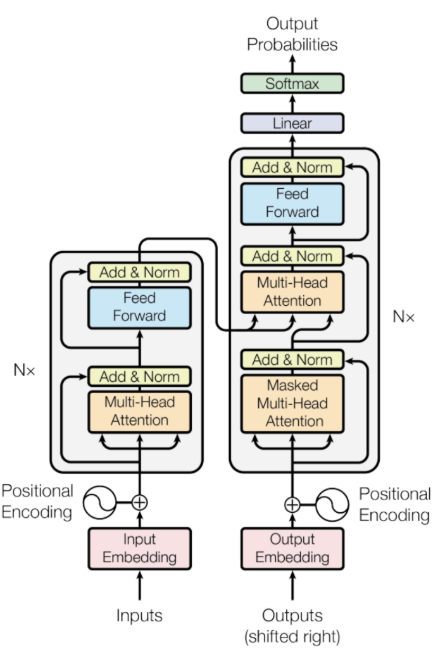

##Input Embedding and positional decoding

In [ ]:
import torch.nn as nn

class TokenAndPositionEmbedding(nn.Module):
  def __init__(self, vocab_size, embed_dim, max_length, device = 'cpu'):
    super().__init__()

    self.device = device
    self.word_emb = nn.Embedding(
        num_embeddings = vocab_size,
        embedding_dim = embed_dim
    )
    self.pos_emb = nn.Embedding(
        num_embeddings = max_length,
        embedding_dim = embed_dim
    )

  def forward(self, x):
    N, seq_len = x.size()
    positions = torch.arange(0, seq_len).expand(N, seq_len).to(self.device)
    output1 = self.word_emb(x)
    output2 = self.pos_emb(positions)
    return output1 + output2

##Encoder

In [ ]:
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embed_dim, num_heads, ff_dim, dropout = 0.1):
    super().__init__()

    self.attn = nn.MultiheadAttention(
        embed_dim = embed_dim,
        num_heads = num_heads,
        batch_first = True
    )
    self.ffn = nn.Sequential(
        nn.Linear(embed_dim, ff_dim, bias = True),
        nn.ReLU(),
        nn.Linear(ff_dim, embed_dim, bias = True),
    )
    self.layernorm_1 = nn.LayerNorm(embed_dim, eps = 1e-6)
    self.layernorm_2 = nn.LayerNorm(embed_dim, eps = 1e-6)
    self.dropout_1 = nn.Dropout(dropout)
    self.dropout_2 = nn.Dropout(dropout)

  def forward(self, query, key, value):
    attn_output, _ = self.attn(query, key, value)
    attn_output = self.dropout_1(attn_output)
    out_1 = self.layernorm_1(query + attn_output)
    ffn_output = self.ffn(out_1)
    ffn_output = self.dropout_2(ffn_output)
    out_2 = self.layernorm_2(out_1 + ffn_output)
    return out_2

In [ ]:
class TransformerEncoder(nn.Module):
  def __init__(
      self, src_vocab_size, embed_dim, max_length,
      num_layers , num_heads , ff_dim,
      dropout = 0.1, device = 'cpu'):
    super().__init__()

    self.embedding = TokenAndPositionEmbedding(
        vocab_size = src_vocab_size,
        embed_dim = embed_dim,
        max_length = max_length,
        device = device
    )
    self.layers = nn.ModuleList([
        TransformerEncoderBlock(
            embed_dim = embed_dim,
            num_heads = num_heads,
            ff_dim = ff_dim,
            dropout = dropout
        ) for _ in range(num_layers)
    ])

  def forward(self, x):
    output = self.embedding(x)
    for layer in self.layers:
      output = layer(output, output, output)
    return output

##Transformer Decoder

In [ ]:
class TransformerDecoderBlock(nn.Module):
  def __init__(self, embed_dim, num_heads, ff_dim, dropout = 0.1):
    super().__init__()

    self.attn = nn.MultiheadAttention(
        embed_dim = embed_dim,
        num_heads = num_heads,
        batch_first = True
    )
    self.cross_attn = nn.MultiheadAttention(
        embed_dim = embed_dim,
        num_heads = num_heads,
        batch_first = True
    )
    self.ffn = nn.Sequential(
        nn.Linear(embed_dim, ff_dim, bias = True),
        nn.ReLU(),
        nn.Linear(ff_dim, embed_dim, bias = True),
    )
    self.layernorm_1 = nn.LayerNorm(embed_dim)
    self.layernorm_2 = nn.LayerNorm(embed_dim)
    self.layernorm_3 = nn.LayerNorm(embed_dim)

    self.dropout_1 = nn.Dropout(dropout)
    self.dropout_2 = nn.Dropout(dropout)
    self.dropout_3 = nn.Dropout(dropout)

  def forward(self, x, enc_output, src_mask, tgt_mask):
    attn_output, _ = self.attn(x, x, x, attn_mask = tgt_mask)
    attn_output = self.dropout_1(attn_output)
    out_1 = self.layernorm_1(attn_output + x)

    attn_output, _ = self.cross_attn(
        out_1, enc_output, enc_output, attn_mask = src_mask
    )
    attn_output = self.dropout_2(attn_output)
    out_2 = self.layernorm_2(attn_output)
    ffn_output = self.ffn(out_2)
    ffn_output = self.dropout_3(ffn_output)
    out_3 = self.layernorm_3(ffn_output + out_2)
    return out_3

In [ ]:
class TransformerDecoder(nn.Module):
    def __init__(self, tgt_vocab_size, embed_dim, max_length, num_layers,
                 num_heads, ff_dim, dropout=0.1, device='cpu'):
      super().__init__()
      self.device = device
      self.embedding = TokenAndPositionEmbedding(
          vocab_size=tgt_vocab_size,
          embed_dim=embed_dim,
          max_length=max_length,
          device=device
      )
      self.layers = nn.ModuleList([
          TransformerDecoderBlock(
              embed_dim=embed_dim,
              num_heads=num_heads,
              ff_dim=ff_dim,
              dropout=dropout
          ) for _ in range(num_layers)
      ])

    def forward(self, x, enc_output, src_mask, tgt_mask):
      output = self.embedding(x)
      for layer in self.layers:
        output = layer(output, enc_output, src_mask, tgt_mask)
      return output

##Main model

In [ ]:
class TransformerEncoderCls(nn.Module):
  def __init__(
      self, vocab_size, max_length, num_layers,
      embed_dim , num_heads , ff_dim,
      dropout = 0.1, device = 'cpu'):
    super().__init__()

    self.encoder = TransformerEncoder(
        src_vocab_size = vocab_size,
        embed_dim = embed_dim,
        max_length = max_length,
        num_layers = num_layers,
        num_heads = num_heads,
        ff_dim = ff_dim,
        dropout = dropout,
        device = device
    )
    self.pooling = nn.AvgPool1d(kernel_size = max_length)
    self.fc1 = nn.Linear(embed_dim, 20)
    self.fc2 = nn.Linear(20, 2)
    self.dropout = nn.Dropout(dropout)
    self.relu = nn.ReLU()

  def forward(self, x):
    output = self.encoder(x)
    output = self.pooling(output.permute (0, 2 ,1)).squeeze()
    output = self.dropout(output)
    output = self.fc1(output)
    output = self.dropout(output)
    output = self.fc2(output)
    return output

#Training

In [ ]:
import torch.optim as optim
import os

vocab_size = 10000
max_length = 100
embed_dim = 200
num_layers = 2
num_heads = 4
ff_dim = 128
dropout =0.1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerEncoderCls(
    vocab_size = vocab_size,
    max_length = max_length,
    num_layers = num_layers,
    embed_dim = embed_dim,
    num_heads = num_heads,
    ff_dim = ff_dim,
    dropout = dropout,
    device = device
).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()

num_epochs = 50
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'model'

model, metrics = train(
    model,
    model_name,
    save_model,
    optimizer,
    criterion,
    train_dataloader,
    valid_dataloader,
    num_epochs,
    device
)

| epoch   1 |    50/  235 batches | accuracy    0.530
| epoch   1 |   100/  235 batches | accuracy    0.589
| epoch   1 |   150/  235 batches | accuracy    0.673
| epoch   1 |   200/  235 batches | accuracy    0.720
----------------------------------------------------------------------------------------------------
| end of epoch   1 | train loss  0.64 | train acc    0.751 | valid loss  0.53 | valid acc    0.758
----------------------------------------------------------------------------------------------------
| epoch   2 |    50/  235 batches | accuracy    0.765
| epoch   2 |   100/  235 batches | accuracy    0.781
| epoch   2 |   150/  235 batches | accuracy    0.794
| epoch   2 |   200/  235 batches | accuracy    0.798
----------------------------------------------------------------------------------------------------
| end of epoch   2 | train loss  0.47 | train acc    0.795 | valid loss  0.46 | valid acc    0.794
-------------------------------------------------------------------

##Visualize

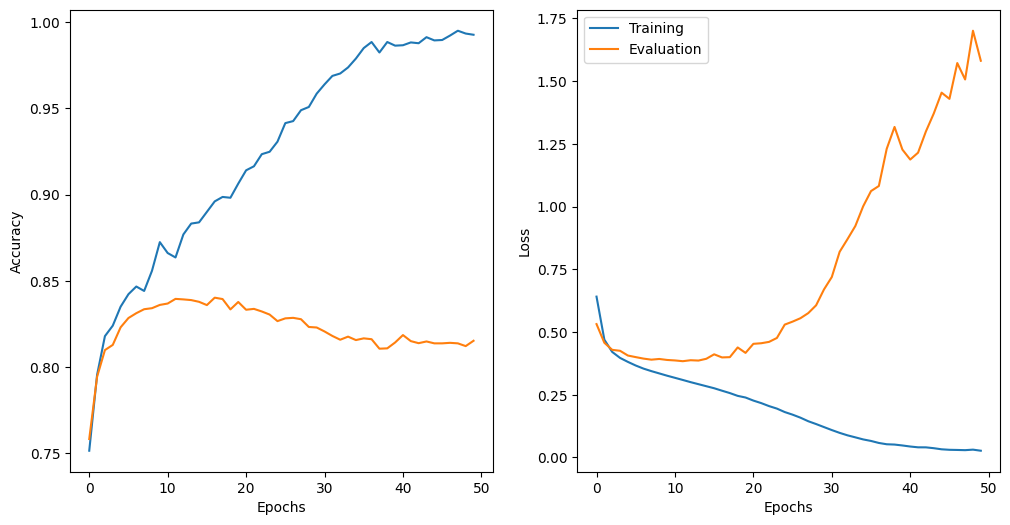

In [ ]:
plot_result(
    num_epochs,
    metrics['train_accuracy'],
    metrics['train_loss'],
    metrics['valid_accuracy'],
    metrics['valid_loss']
)

##Evaluate

In [ ]:
test_acc, test_loss = evaluate_epoch(model, criterion, test_dataloader, device)
print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.8487, Test Loss: 0.3524


#Text Classification using BERT

In [1]:
!pip install -q -U transformers datasets accelerate evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset

ds = load_dataset('thainq107/ntc-scv')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/570 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

valid-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

##Data

In [3]:
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    use_fast = True
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [6]:
max_seq_length = 100
max_seq_length = min(max_seq_length, tokenizer.model_max_length)

def preprocess_function(examples):
  #Tokenize the text

  result = tokenizer(
      examples['preprocessed_sentence'],
      padding = 'max_length',
      max_length = max_seq_length,
      truncation = True
  )
  result['label'] = examples['label']
  return result

preprocessed_ds = ds.map(
    preprocess_function,
    batched = True,
    desc = "Running tokenizer on dataset"
)

Running tokenizer on dataset:   0%|          | 0/30000 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/10000 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/10000 [00:00<?, ? examples/s]

##Modeling

In [7]:
from transformers import AutoConfig, AutoModelForSequenceClassification

num_labels = 2

config = AutoConfig.from_pretrained(
    model_name,
    num_labels = num_labels,
    finetuning_task = 'text-classification'
)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    config = config
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Metric

In [9]:
import numpy as np
import evaluate

metric = evaluate.load('accuracy')

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis = -1)
  result = metric.compute(predictions = predictions, references = labels)
  return result

##Trainer

In [11]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = './save_model',
    learning_rate = 2e-5,
    per_device_train_batch_size = 128,
    per_device_eval_batch_size=128,
    num_train_epochs=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=preprocessed_ds['train'],
    eval_dataset=preprocessed_ds['test'],
    compute_metrics=compute_metrics,
    tokenizer = tokenizer
)

trainer.train()

<ipython-input-11-81e6592fe86d>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: xinquyhung91005 (xinquyhung91005-tr-ng-i-h-c-khoa-h-c-t-nhi-n-hqg-hcm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.417814,0.818200
2,No log,0.474545,0.792600
3,0.454300,0.370229,0.843000
4,0.454300,0.362969,0.847900
5,0.344100,0.369855,0.849700
6,0.344100,0.364025,0.853900
7,0.280300,0.379737,0.851100
8,0.280300,0.399766,0.848700
9,0.234300,0.406147,0.852200
10,0.234300,0.414693,0.849100


TrainOutput(global_step=2350, training_loss=0.31042123023499835, metrics={'train_runtime': 2630.5, 'train_samples_per_second': 114.047, 'train_steps_per_second': 0.893, 'total_flos': 7761761640000000.0, 'train_loss': 0.31042123023499835, 'epoch': 10.0})

##Inference

In [24]:
from transformers import pipeline

def inference(text, classifier):
  result = classifier(text)[0]
  print(result)

classifier = pipeline(
    task = 'text-classification',
    model = 'thainq107/ntc-scv-distilbert-base-uncased'
)
text = 'đồ ăn ngon!'
inference(text, classifier)
#

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


{'label': 'LABEL_1', 'score': 0.7654244303703308}
